In [1]:
import numpy as np
import meshpy.triangle as triangle
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from scipy.sparse.linalg import spsolve
import matplotlib

from chp06_utils import *

%matplotlib widget
# Define corners of the rectangle
points = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
segments = np.array([[0, 1], [1, 2], [2, 3], [3, 0]])  # edges between points

In [2]:
save_fig=False

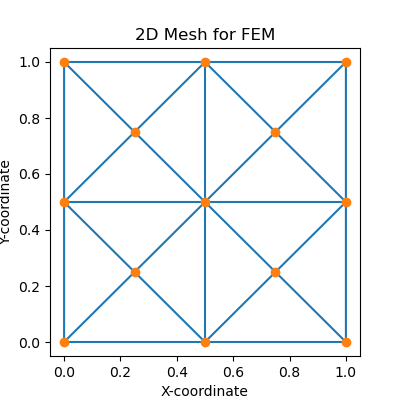

In [3]:
mesh = generate_mesh(points, segments, max_volume=0.1, min_angle=20)
vertices, triangles = extract_mesh_data(mesh)
plot_mesh(vertices, triangles, figsize=(4,4))
plt.tight_layout()
if save_fig:
    plt.savefig('assets/mesh-coarse.pdf')

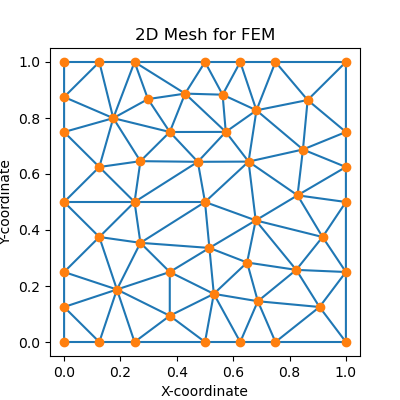

In [4]:
mesh = generate_mesh(points, segments, max_volume=0.02, min_angle=30)
vertices, triangles = extract_mesh_data(mesh)
plot_mesh(vertices, triangles, figsize=(4,4))
plt.tight_layout()
if save_fig:
    plt.savefig('assets/mesh-refine.pdf')

In [5]:
def compute_coef(v1, v2, v3, p1, p2, p3):
    """
        given three vertices v1, v2, v3 and function values p_1, p_2, p_3
        find a plane P(x,y) = A + B x + C y to connect them.
    """

    a = v2 - v1
    b = v3 - v1
    
    α= a[1]*b[0] - a[0]*b[1] 
    B = -((a[1]-b[1]) * p1 + b[1]*p2 - a[1]*p3)/α
    C = ((a[0]-b[0])*p1 + b[0]*p2 - a[0]*p3)/α
    A = p1 - v1[0]*B - v1[1]*C
    return A, B, C

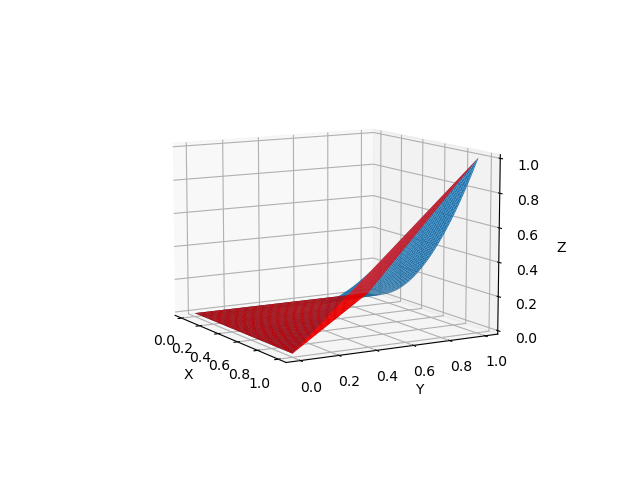

In [6]:
# Define the X and Y coordinates
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
XX, YY = np.meshgrid(X, Y)

def f(x,y):
    return x**2 * (y)

def g(x):
    return x[0]**2 * (x[1])

ZZ = f(XX,YY)

v1 = np.array([0,0])
v2 = np.array([1,0])
v3 = np.array([0,1])
v4 = np.array([1,1])
p1 = g(v1)
p2 = g(v2)
p3 = g(v3)
p4 = g(v4)
A, B, C = compute_coef(v1, v2, v3, p1, p2, p3)
A2, B2, C2 = compute_coef(v2, v3, v4, p2, p3, p4)

Approx = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        x = XX[i,j]
        y = YY[i,j]
        if x + y <= 1:
            Approx[i,j] = (A + B * x + C * y)
        else:
            Approx[i,j] = (A2 + B2 * x + C2 * y)
            
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(XX, YY, ZZ)
ax.plot_surface(XX, YY, Approx, color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=10, azim=-30, roll=0)
plt.show()
if save_fig:
    plt.savefig("assets/approx_surf.pdf")

In [7]:
print("Plane 1 is P(x,y) = {:.1f} + {:.1f} x + {:.1f} y".format(A, B, C))
print("Plane 2 is P(x,y) = {:.1f} + {:.1f} x + {:.1f} y".format(A2, B2, C2))

Plane 1 is P(x,y) = 0.0 + -0.0 x + -0.0 y
Plane 2 is P(x,y) = -1.0 + 1.0 x + 1.0 y
